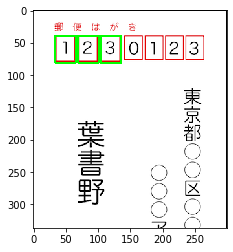

In [40]:
import cv2
import matplotlib.pyplot as plt

#はがき画像から郵便番号領域を抽出する関数
def detect_zipno(fname):
    #画像を読み込む
    img = cv2.imread(fname)
    #画像のサイズを求める
    h,w = img.shape[:2]
    #はがき画像の右上のみ抽出する
    img = img[0:h//2, w//3:]
    
    #画像を二値化
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3,3),0)
    im2 = cv2.threshold(gray,140,255,cv2.THRESH_BINARY_INV)[1]
    
    #輪郭を抽出
    cnts = cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0]
    
    #抽出した輪郭を単純なリストに変換
    result = []
    for pt in cnts:
        x,y,w,h = cv2.boundingRect(pt)
        #大きすぎる小さすぎる領域を除去
        if not(30<w<40):continue
        result.append([x,y,w,h])
    
    #抽出した輪郭が左側から並ぶようソート
    result = sorted(result, key=lambda x: x[0])
    
    #抽出した輪郭が近すぎるものを除去
    result2 = []
    lastx = -100
    for x,y,w,h in result:
        if(x-lastx) < 10 : continue
        result2.append([x,y,w,h])
        lastx =x
        
    #緑色の枠を描画
    for x,y,w,h in result2:
        cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0),2)
    return result2, img
    
if __name__ == '__main__':
    #はがき画像を指定して領域を抽出
    cnts, img = detect_zipno("3_4_2_test2.png")
    
    #画面に抽出結果を描画
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.savefig("3_4_2_dict_zip.png",dip=200)
    plt.show()